<a href="https://colab.research.google.com/github/markcastorm/Quantum-Support-Vector-Machine-QSVM-Notebook/blob/main/Quantum_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


A quantum support vector machine (QSVM) can be described as a variant of a e classical support vector machine (SVM) algorithm which uses quantum computing resources to perform the training and prediction tasks

 QSVM algorithm is important where the classical SVM algorithm is not able to find a good decision boundary due to the limitations of classical computing resources. By using quantum computing resources, the QSVM algorithm can find a decision boundary in a higher-dimensional space, which can improve the performance of the SVM algorithm.


## Quantum Feature Maps

In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=1a1237722c3b48afac202cdcc7f0deb0d0f62feea1b85f6cf9db4c31010fb5ff
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


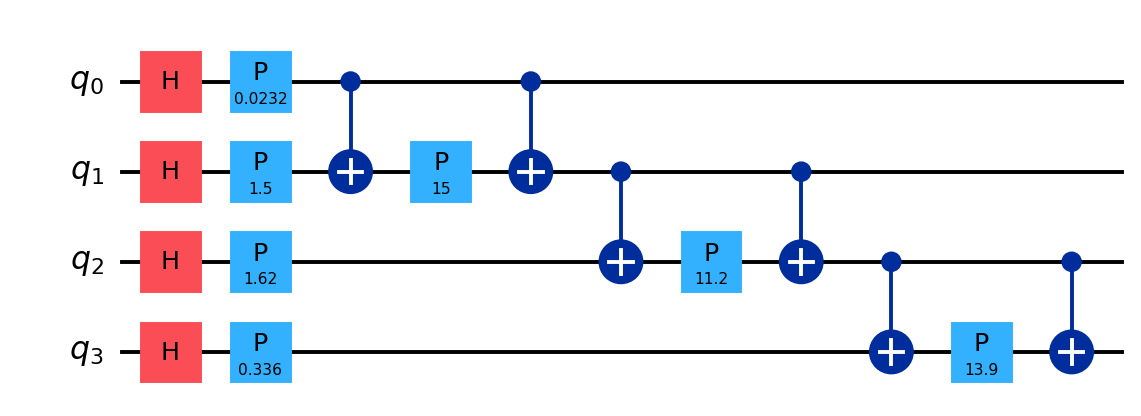

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_qubits = 4
x = np.random.random(num_qubits)
data = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement="linear")
data.assign_parameters(x, inplace=True)
data.decompose().draw("mpl", style="iqx", scale=1.4)

The code above creates a random input vector x of size 4 num_qubits  and then we create an instance of the ZZFeatureMap class.

The feature_dimension parameter is set to num_qubits, the reps parameter is set to 1, that  means that the circuit will be applied once to the qubits, and the entanglement parameter is set to 'linear', which means that the qubits will be fully connected

The assign_parameters () is used to assign the random input vector x to the circuit's parameters.

The decompose() is used to decompose the circuit into a set of gates that can be executed on a real quantum computer,

The draw() method is used to display the circuit.

WHile ZZFeatureMap is a circuit that can be used to map input data points to higher-dimensional space, so that it can be possible to find a linear decision boundary in higher-dimensional space.

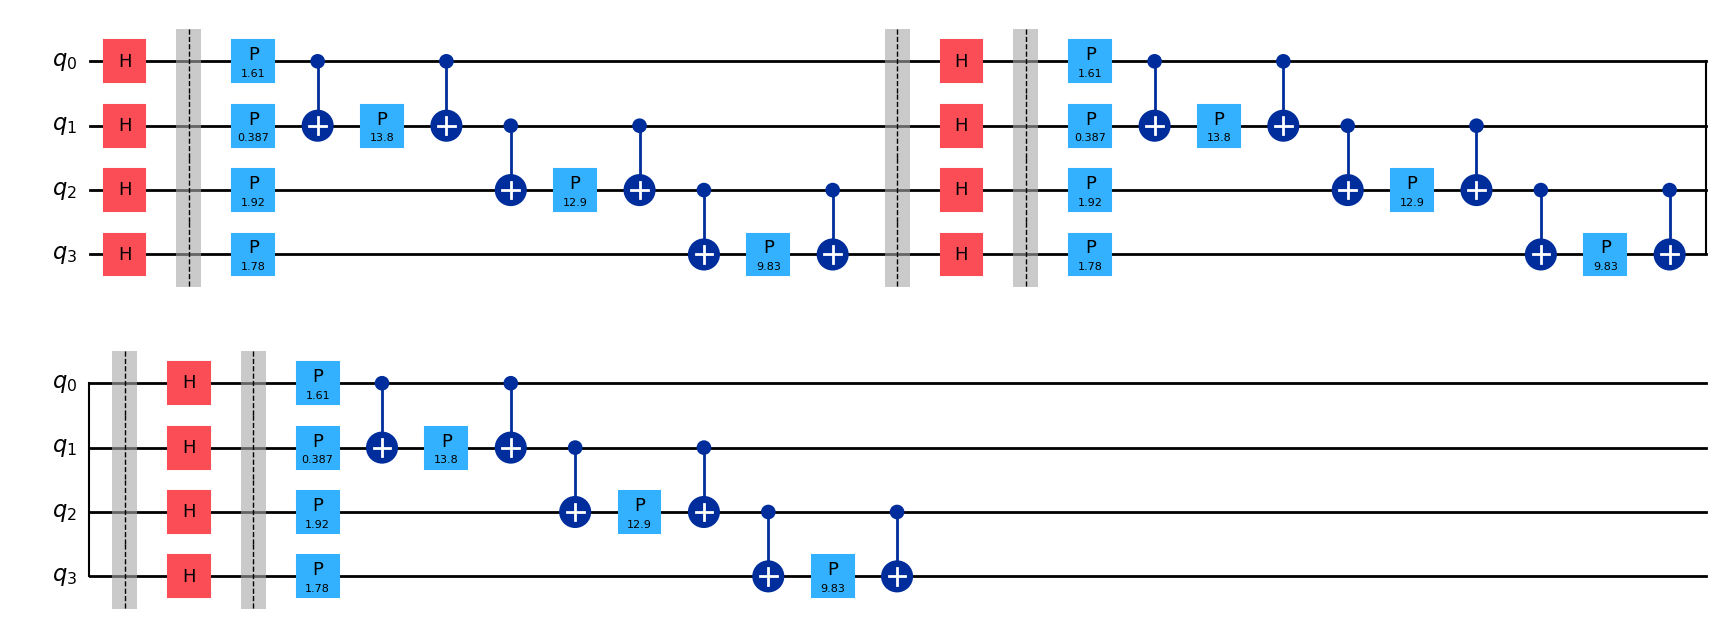

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_qubits = 4
x = np.random.random(num_qubits)
data = ZZFeatureMap(
    feature_dimension=num_qubits, reps=3, entanglement="linear", insert_barriers=True
)
data.assign_parameters(x, inplace=True)
data.decompose().draw("mpl", style="iqx")

This code creates a quantum circuit that applies a ZZFeatureMap to a set of qubits, but the reps parameter is now set to 3, which means that the circuit will be applied 3 times to the qubits.By applying the circuit multiple times, we increase the feature dimension of the input data points. This can potentially improve the classification performance of the circuit

Building a quantum kernel

In [ ]:
from qiskit import BasicAer, transpile, QuantumCircuit

backend = BasicAer.get_backend("qasm_simulator")
shots = 1024

dimention = 2
feature_map = ZZFeatureMap(dimention, reps=1)


The BasicAer.get_backend('qasm_simulator') function is used to create an instance of the QASM simulator backend. This backend can be used to simulate the circuit using a classical computer.

The code above create a quantum circuit that applies a ZZFeatureMap to a set of qubits, and then simulates the circuit using a basic quantum assembly language (QASM) simulator backend

In [ ]:
def evaluate_kernel(x_i, x_j):

  circuit = QuantumCircuit(dimention)
  circuit.compose(feature_map.assign_parameters(x_i), inplace=True)
  circuit.compose(feature_map.assign_parameters(x_j).inverse(), inplace=True)
  circuit.measure_all()

  transpiled = transpile(circuit, backend)
  counts = backend.run(transpiled, shots=shots).result().get_counts()
  return counts.get("0" * dimention, 0) / shots


The code above is an evaluate_kernel function that takes two input vectors x_i and x_j and returns the dot product of these vectors in a higher dimensional space.

it will start by creating an instance of the QuantumCircuit class with dimention number of qubits.

 Then, it will compose the feature_map circuit with the parameters x_i and x_j, and then applies the inverse of the circuit with x_j. Which is equivalent to applying the feature_map circuit to both x_i and x_j, and taking their dot product in the higher dimensional space.then measures all qubits, in order to obtain a binary string that represents the dot product of the two input vectors.

 the transpile function wil be used to convert the circuit into a form that can be run on the backend. Fainaly It returns the count of the binary string '0'*dimention divided by the number of shots and this is an estimate of the dot product of the two input vectors in the higher dimensional space, which is known as the kernel trick.

In [ ]:
from data_generators import circle

X,y = circle()
evaluate_kernel(X[2], X[3])

0.1142578125

##Using Qiskit Nature

In [ ]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.8 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512573 sha256=59c99ee8f0b80b089542d9717d208ef98a3142ba7f89592a571541e8ec26bbce
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
import qiskit
from qiskit.providers.aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC

backend = BasicAer.get_backend("qasm_simulator")
feature_map = ZZFeatureMap(dimention, reps=1)
sampler = Sampler()
# Instantiate fidelity with sampler argument only once
fidelity = ComputeUncompute(sampler=sampler)  # Pass sampler directly

# Create a FidelityQuantumKernel object
kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)


# Evaluate the kernel for two data points
kernel_value = kernel.evaluate(X[2], X[3])

This code is using the QuantumKernel class provided by the qiskit_machine_learning library to evaluate the kernel function on the two points X[2] and X[3] from the circle data set.

Classification

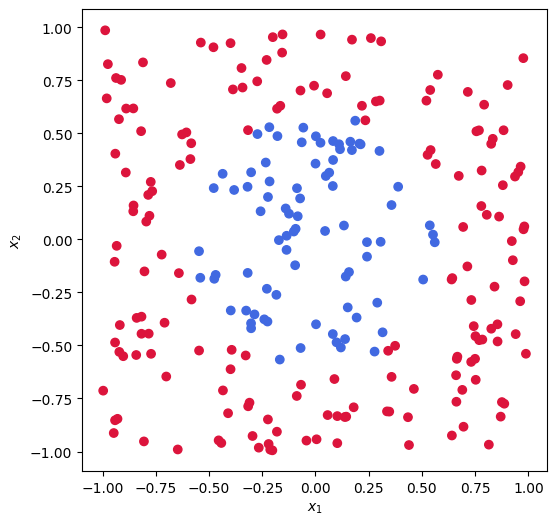

In [ ]:
points, labels = circle()
colors = ["crimson" if label == 1 else "royalblue" for label in labels]

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()



This code snippet uses the circle function from data_generators module to generate a set of points that form a circle. It creates random points between (-1,-1) and (1,1) and labels them as 1 if they are outside of radius of 0.6 and -1 if they are inside the radius of 0.6.Then it plots the point where as  "crimson" color for points with label 1 and "royalblue" color for points with label -1.

In [ ]:
from sklearn.svm import SVC

qsvm = SVC(kernel=kernel.evaluate)
qsvm.fit(points, labels)
predicted = qsvm.predict(points)


Here we  use the scikit-learn library to train a support vector machine (SVM) on the points generated by the circle function.

The kernel parameter is set to the evaluate method of the previously defined kernel object, which is a quantum kernel implemented using the QuantumKernel class.It helps to find a linear decision boundary in a higher-dimensional space, which can improve the performance of the SVM algorithm.

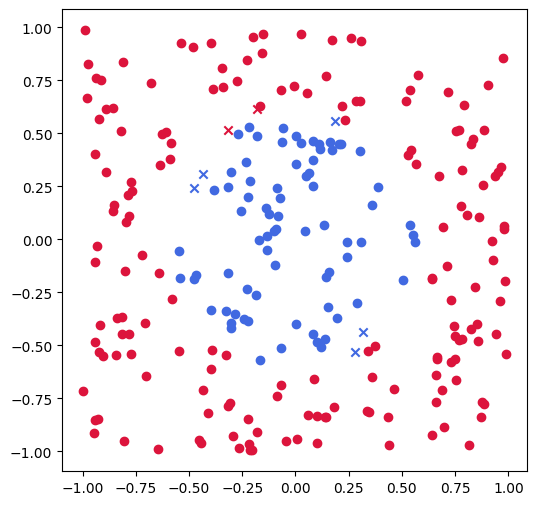

In [ ]:
markers = [
    "o" if label == predicted_label else "x"
    for label, predicted_label in zip(labels, predicted)
]

plt.figure(figsize=(6, 6))
for point, marker, color in zip(points, markers, colors):
    plt.scatter(point[0], point[1], c=color, marker=marker)
plt.show()

 correctly classified by the SVM model labeled as 'o' in red or blue color,While the points that were misclassified by the SVM model labeled as 'x' in red or blue color.